# Data Analysis Test

## Reading the data

In [1]:
import pandas as pd
import numpy as np
import datetime

df_cardioalco = pd.read_csv("cardio_alco.csv", sep=';', index_col=None, dtype=int)
df_cardiobase = pd.read_csv("cardio_base.csv", sep=',', index_col=None, dtype=float)
d_columns = {'location':str,'date':str,'new_cases':float,'new_deaths':float, 'population':float,
       'aged_65_older_percent':float, 'gdp_per_capita':float, 'hospital_beds_per_thousand':float}
df_coviddata = pd.read_csv("covid_data.csv", sep=',', index_col=None, dtype=d_columns)
print(df_cardioalco.shape, df_cardiobase.shape, df_coviddata.shape)

(56903, 2) (70000, 9) (23082, 8)


In [2]:
# looking for missing values
df_cardioalco.isna().sum(), df_cardiobase.isna().sum(), df_coviddata.isna().sum()

(id      0
 alco    0
 dtype: int64,
 id             0
 age            0
 gender         0
 height         0
 weight         0
 ap_hi          0
 ap_lo          0
 cholesterol    0
 smoke          0
 dtype: int64,
 location                         0
 date                             0
 new_cases                        0
 new_deaths                       0
 population                      64
 aged_65_older_percent         2439
 gdp_per_capita                2371
 hospital_beds_per_thousand    3938
 dtype: int64)

In [3]:
df_cardioalco.describe()

,id,alco
count,56903.000000,56903.000000
mean,48472.162065,0.053442
std,30994.121701,0.224915
min,44.000000,0.000000
25%,20401.000000,0.000000
50%,40763.000000,0.000000
75%,77109.500000,0.000000
max,99954.000000,1.000000


## percentual difference between lightest and heaviest age groups?

In [4]:
df_cardiobase.filter(['weight','height']).sort_values(by='weight')

,weight,height
57858,10.0,165.0
33817,11.0,178.0
60188,21.0,162.0
29488,22.0,177.0
26806,23.0,157.0
...,...,...
61362,180.0,196.0
36780,181.0,161.0
61285,183.0,180.0
50413,200.0,180.0


In [5]:
# from age in days to age in years (round down as specified by the problem)
df_age = df_cardiobase.filter(['age','weight'])
df_age.age = df_age.age.apply(lambda x: int(x/365))
df_age

,age,weight
0,50,62.0
1,55,85.0
2,51,64.0
3,48,82.0
4,47,56.0
...,...,...
69995,52,76.0
69996,61,126.0
69997,52,105.0
69998,61,72.0


In [6]:
df_age_meanweight = df_age.groupby(by=['age']).mean().sort_values(by='weight')
df_age_meanweight.max() / df_age_meanweight.min() - 1

weight    0.285995
dtype: float64

## Do people over 50 have higher blood pressure?

In [7]:
df_fixed_age = df_cardiobase.filter(df_cardiobase.columns)
df_fixed_age.age = df_fixed_age.age.apply(lambda x: int(x/365))
df_fixed_age.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0.0,50,2.0,168.0,62.0,110.0,80.0,1.0,0.0
1,1.0,55,1.0,156.0,85.0,140.0,90.0,3.0,0.0
2,2.0,51,1.0,165.0,64.0,130.0,70.0,3.0,0.0


In [8]:
df_fixed_age['over50'] = df_fixed_age.age.apply(lambda x: 1 if x>50 else 0)
df_fixed_age.groupby('over50').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
over50,,,,,,,,,
0,49786.098112,45.199188,1.370477,165.136772,73.262789,125.500670,92.109360,1.248041,0.103959
1,50073.536683,56.987702,1.338226,163.937256,74.717402,130.617212,99.083989,1.431361,0.079537


## Does gender matter in regards to smoking?

In [9]:
df_cardiobase.groupby('gender').mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,smoke
gender,,,,,,,,
1.0,49898.345267,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,0.017856
2.0,50110.246547,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,0.218880


Using the height, we can infer that 1 refers to females, and 2 to males

In [10]:
print('Smoking overall probability:',df_cardiobase.smoke.value_counts()[1] / df_cardiobase.smoke.value_counts()[0])
df_cardiobase.smoke.value_counts(), df_cardiobase.gender.value_counts()

Smoking overall probability: 0.09664583039588914


(0.0    63831
 1.0     6169
 Name: smoke, dtype: int64,
 1.0    45530
 2.0    24470
 Name: gender, dtype: int64)

In [11]:
df_smoking_bygender = df_cardiobase.groupby(['gender','smoke']).size()
prob_fema = df_smoking_bygender.iloc[1] / (df_smoking_bygender.iloc[0]+df_smoking_bygender.iloc[1])
prob_male = df_smoking_bygender.iloc[3] / (df_smoking_bygender.iloc[2]+df_smoking_bygender.iloc[3])
print(f'probability that a female smokes: {prob_fema:.3f}')
print(f'probability that a male smokes: {prob_male:.3f}')
print(f'how more like is a male to smoke than a female? {(prob_male/prob_fema):.3f}')
df_smoking_bygender

probability that a female smokes: 0.018
probability that a male smokes: 0.219
how more like is a male to smoke than a female? 12.258


gender  smoke
1.0     0.0      44717
        1.0        813
2.0     0.0      19114
        1.0       5356
dtype: int64

## At what height is the top 1%?

In [12]:
df_cardiobase.height.quantile(q=0.99)

184.0

## What is the highest Spearman rank correlation?

<AxesSubplot:>

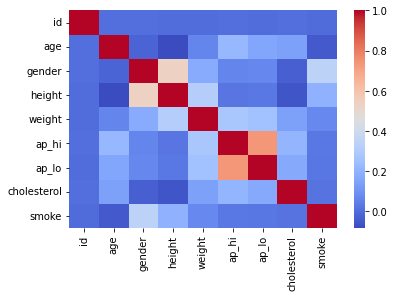

In [13]:
import seaborn as sns
m_corr = df_cardiobase.corr(method='spearman')
sns.heatmap(m_corr, cmap="coolwarm")

## What percentage of the population is more than 2 standard deviations away from the mean?

In [14]:
std_height = df_cardiobase.height.std()*2, 
mean_height = df_cardiobase.height.mean()

In [15]:
tr_low = (mean_height-std_height)[0]
tr_hig = (mean_height+std_height)[0]
print(tr_low, tr_hig)
df_2std_away = df_cardiobase[(df_cardiobase.height<tr_low) | (df_cardiobase.height>tr_hig)].sort_values(by='height')
print(df_2std_away.shape)
df_2std_away


147.93897584235248 180.77948130050464
(2335, 9)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
22723,32456.0,23386.0,1.0,55.0,81.0,130.0,90.0,1.0,0.0
66643,95141.0,18830.0,1.0,57.0,61.0,130.0,90.0,1.0,0.0
64115,91523.0,18426.0,1.0,59.0,57.6,125.0,67.0,1.0,0.0
29157,41661.0,19088.0,1.0,60.0,69.0,110.0,70.0,1.0,0.0
27603,39462.0,20978.0,1.0,64.0,61.0,130.0,70.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
29145,41642.0,21812.0,2.0,198.0,90.0,130.0,90.0,1.0,0.0
57529,82105.0,18824.0,2.0,198.0,78.0,120.0,80.0,1.0,1.0
41901,59847.0,19187.0,2.0,200.0,100.0,170.0,1100.0,2.0,0.0
21628,30894.0,19054.0,2.0,207.0,78.0,100.0,70.0,1.0,0.0


In [16]:
df_2std_away.shape[0] / df_cardiobase.shape[0]

0.033357142857142856

## what percentage of the population consumes alcohol?

In [17]:
df_cardioalco.head(2)

,id,alco
0,44,0
1,45,0


In [18]:
df_cardiobase.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,0.0
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,0.0


In [19]:
df_base_alco_merged = df_fixed_age.merge(df_cardioalco, how='right', on='id')
df_base_alco_merged

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,over50,alco
0,44.0,40,1.0,159.0,60.0,110.0,70.0,1.0,0.0,0,0
1,45.0,56,1.0,160.0,73.0,130.0,85.0,1.0,0.0,1,0
2,46.0,60,2.0,173.0,82.0,140.0,90.0,3.0,0.0,1,0
3,47.0,55,1.0,163.0,55.0,120.0,80.0,1.0,0.0,1,0
4,49.0,50,2.0,175.0,95.0,120.0,80.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
56898,99949.0,57,1.0,178.0,69.0,130.0,90.0,1.0,0.0,1,0
56899,99950.0,53,2.0,155.0,76.0,130.0,90.0,1.0,0.0,1,0
56900,99951.0,61,2.0,170.0,72.0,120.0,80.0,1.0,0.0,1,0
56901,99952.0,42,2.0,165.0,66.0,120.0,80.0,1.0,0.0,0,0


In [20]:
counts_alcohol = df_base_alco_merged[df_base_alco_merged.age>50].alco.value_counts()
counts_alcohol[1] / counts_alcohol[0]

0.05161989504905316

95% confidence statement

In [21]:
df_cardiobase.groupby('smoke').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol
smoke,,,,,,,,
0.0,50005.59844,19505.400730,1.299447,163.879416,73.902352,128.861431,96.326550,1.364682
1.0,49629.11963,19090.836927,1.868212,169.323877,77.344351,128.360512,99.774518,1.389528


In [22]:
df_cardiobase.groupby('gender').mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,smoke
gender,,,,,,,,
1.0,49898.345267,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,0.017856
2.0,50110.246547,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,0.218880


In [23]:
import scipy
x1 = df_cardiobase[df_cardiobase.gender==1].ap_lo
x2 = df_cardiobase[df_cardiobase.gender==2].ap_lo
pval = 0.05
stat, pval1 = scipy.stats.shapiro(x1)
stat, pval2 = scipy.stats.shapiro(x2)
pval1,pval2 # if H0 is rejected => not normal

d:\Programs\Anaconda\envs\mTest\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.0, 0.0)

In [24]:
scipy.stats.mannwhitneyu(x1,x2)
# (if no mistakes were made, a low pvalue indicates that those are significantly different)

MannwhitneyuResult(statistic=515430119.5, pvalue=4.917472046649865e-69)

# Covid Data
## when did the difference in total number of confirmed cases between Italy and Germany become more than 10000

In [25]:
df_coviddata = pd.read_csv("covid_data.csv", sep=',', index_col=None, dtype=d_columns)
df_coviddata.date = pd.to_datetime(df_coviddata.date)
print(df_coviddata.shape)
df_coviddata.head(2)

(23082, 8)


,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0.0,0.0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0.0,0.0,38928341.0,2.581,1803.987,0.5


In [26]:
df_coviddata.location.value_counts()

Mexico            163
Greece            163
Singapore         163
China             163
Italy             163
                 ... 
Yemen              62
Western Sahara     46
Tajikistan         41
Comoros            40
Lesotho            27
Name: location, Length: 212, dtype: int64

In [27]:
df_coviddata.isna().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [28]:
df_relevant_coviddata = df_coviddata.filter(['location','date','new_cases'])
df_covid_deu = df_relevant_coviddata[df_relevant_coviddata.location=='Germany']
df_covid_ita = df_relevant_coviddata[df_relevant_coviddata.location=='Italy']

# adding the cummulative sum of new cases
df_covid_deu.insert(len(df_covid_deu.columns), "new_cases_sum", df_covid_deu.new_cases.cumsum(),False) 
df_covid_ita.insert(len(df_covid_ita.columns), "new_cases_sum", df_covid_ita.new_cases.cumsum(),False) 

In [29]:
# mergin the two dataframes
df_covid_merged = df_covid_deu.merge(df_covid_ita, how='left', on='date',)

# showing the difference in cases between the two countries
df_covid_merged['diff'] = np.abs(df_covid_merged.new_cases_sum_x - df_covid_merged.new_cases_sum_y)
df_covid_merged[df_covid_merged['diff']>=10000].date.sort_values() # the first day this difference was greater or equal to 10 000

72    2020-03-12
73    2020-03-13
74    2020-03-14
75    2020-03-15
76    2020-03-16
         ...    
158   2020-06-06
159   2020-06-07
160   2020-06-08
161   2020-06-09
162   2020-06-10
Name: date, Length: 91, dtype: datetime64[ns]

## Fitting curve on new cases
$y = A*e^{(B_x)} => log(y) = log(A) B_x$

In [30]:
# setting dates restrictions for the questions
date_beg = datetime.datetime(2020,2,28)
date_end = datetime.datetime(2020,3,20)
df_covid_ita_constrained = df_covid_ita[(df_covid_ita['date']>= date_beg) & (df_covid_ita['date']<= date_end)]

In [31]:
df_covid_ita_constrained.head()

,location,date,new_cases,new_cases_sum
10747,Italy,2020-02-28,250.0,650.0
10748,Italy,2020-02-29,238.0,888.0
10749,Italy,2020-03-01,240.0,1128.0
10750,Italy,2020-03-02,561.0,1689.0
10751,Italy,2020-03-03,347.0,2036.0


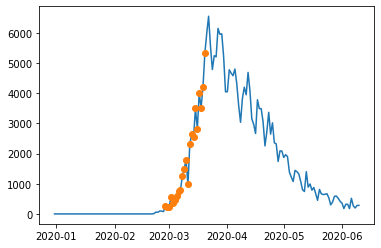

In [32]:
from matplotlib import pyplot as plt

plt.plot(df_covid_ita.date, df_covid_ita['new_cases'],df_covid_ita_constrained.date, df_covid_ita_constrained['new_cases'],'o' )

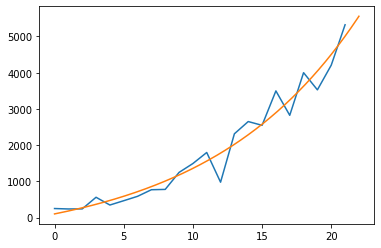

In [33]:
import numpy as np

def f_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

ys = df_covid_ita_constrained.new_cases
xs = np.arange(0, len(ys))

params, cv = scipy.optimize.curve_fit(f_exp, xs, ys, p0=(1, 1e-3, 1))

xx = np.linspace(0, len(ys), 1000)
yy = f_exp(xx,*params)
plt.plot( xs,ys, xx, yy , "-")
plt.show()

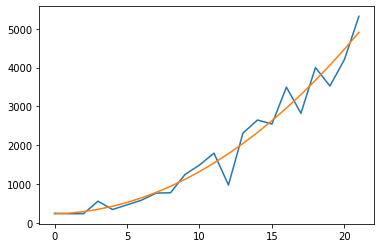

In [34]:
# other way of fitting curves
coef   = np.polyfit(xs,ys,3)
f_poly = np.poly1d(coef)
plt.plot(xs,ys,'-', xs,f_poly(xs),'-')
plt.show()

## The change that a country has a GDP over 10000 given that is has 5 or more Hospotals Beds per thousand habitants

In [35]:
df_coviddata.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


<AxesSubplot:ylabel='Frequency'>

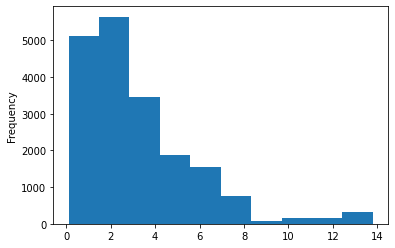

In [36]:
df_coviddata.hospital_beds_per_thousand.plot.hist()

In [37]:
df_coviddata.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


In [38]:
df_coviddata[df_coviddata.hospital_beds_per_thousand>=5].describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,3499.000000,3499.000000,3.499000e+03,3348.000000,3260.000000,3499.000000
mean,327.477279,17.735925,3.047847e+07,16.456099,27095.994353,7.617390
std,1207.334003,83.776238,4.073699e+07,5.185674,11317.987433,2.504095
min,-766.000000,0.000000,3.924400e+04,3.556000,5189.972000,5.000000
25%,0.000000,0.000000,4.105268e+06,14.178000,18563.307000,5.800000
50%,15.000000,0.000000,1.070898e+07,17.850000,25063.846000,6.630000
75%,146.000000,5.000000,4.519578e+07,19.718000,36605.198250,8.050000
max,11656.000000,2004.000000,1.459345e+08,27.049000,45436.686000,13.800000


In [39]:
date_end = datetime.datetime(2020,6,9)
df_covidddata_lastday = df_coviddata[df_coviddata.date>date_end]

In [40]:
lower_hbeds, higher_hbeds = df_covidddata_lastday.hospital_beds_per_thousand.apply(lambda x: x>=5).value_counts()
lower_hbeds, higher_hbeds

(181, 28)

In [41]:
lower_gdp, higher_gdp = df_covidddata_lastday.gdp_per_capita.apply(lambda x: x>=10000).value_counts()
lower_gdp, higher_gdp

(106, 103)

In [42]:
df_covidddata_lastday[df_covidddata_lastday.hospital_beds_per_thousand>=5].gdp_per_capita.apply(lambda x: x>=10000).value_counts()

True     23
False     5
Name: gdp_per_capita, dtype: int64

In [46]:
print(f"Change that a country has over {10000:_} GDP: {higher_gdp/(higher_gdp+lower_gdp)*100:.2f}%")
print(f"But, for a country with over 5 hospital beds per 1000 habitants: {23/28 * 100:.2f}%")

Change that a country has over 10_000 GDP: 49.28%
But, for a country with over 5 hospital beds per 1000 habitants: 82.14%
